In [1]:
import os
import torch

from dpnegf.runner.NEGF import NEGF
from dptb.nn.build import build_model
import json

from dpnegf.utils.loggers import set_log_handles
import logging
from pathlib import Path

import matplotlib.pyplot as plt

In [ ]:
import os
workdir='/root/soft/DPNEGF/examples/base_model/'
os.chdir(f"{workdir}/structures")
!tree -L 1 ./

In [2]:
INPUT_file =  "./input_files/negf_chain_new.json" 
model =  "./input_files/nnsk_C_new.json"
structure =  "./input_files/chain.vasp" 
output = "output"  

if os.path.exists(output):
    os.system('rm -rf %s' % output)


negf_json = json.load(open(INPUT_file))
model_json = json.load(open(model))

log_path = output+'/log'
log_level = logging.INFO
set_log_handles(log_level, Path(log_path) if log_path else None)

model = build_model(model,model_options= model_json['model_options'],
                    common_options=model_json['common_options'])


DPNEGF INFO    ================================================================================
DPNEGF INFO                                      Version Info                                  
DPNEGF INFO    --------------------------------------------------------------------------------
DPNEGF INFO    DPNEGF               : 0.1.1.dev97+bccd946
DPNEGF INFO    DeePTB               : 2.1.2.dev53+5b97981
DPNEGF INFO    ================================================================================

DPNEGF WARNING The model option atomic_radius in nnsk is not defined in input model_options, set to v1.


In [3]:
negf = NEGF(
    model=model,
    AtomicData_options=negf_json['AtomicData_options'],
    structure=structure,
    results_path=output,  
    **negf_json['task_options']
)
   
negf.compute()

DPNEGF INFO    ------ k-point for NEGF -----
DPNEGF INFO    Gamma Center: True
DPNEGF INFO    Time Reversal: True
DPNEGF INFO    k-points Num: 1
DPNEGF INFO    k-points: [[0 0 0]]
DPNEGF INFO    k-points weights: [1.]
DPNEGF INFO    --------------------------------
DPNEGF WARNING AtomicData_options is extracted from input file. This may be not consistent with the model options. Please be careful and check the cutoffs.
DPNEGF INFO    The AtomicData_options is:
               {
                   "r_max": 2.0
               }
DPNEGF INFO    Lead principal layers translational equivalence error (on average): 1.732052e-10 (threshold: 1.000000e-05)
DPNEGF INFO    Lead principal layers translational equivalence error (on average): 1.732051e-10 (threshold: 1.000000e-05)
/opt/mamba/envs/dpnegf-dev/lib/python3.10/site-packages/torch/nested/__init__.py:107: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/sr

In [4]:
negf_out = torch.load('./output/negf.out.pth')

/tmp/ipykernel_16165/1724458665.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  negf_out = torch.load('./output/negf.out.pth')


In [5]:
negf_out.keys()

dict_keys(['k', 'wk', 'uni_grid', 'DOS', 'T_k', 'LDOS', 'T_avg', 'BIAS_POTENTIAL_NSCF', 'CURRENT_NSCF'])

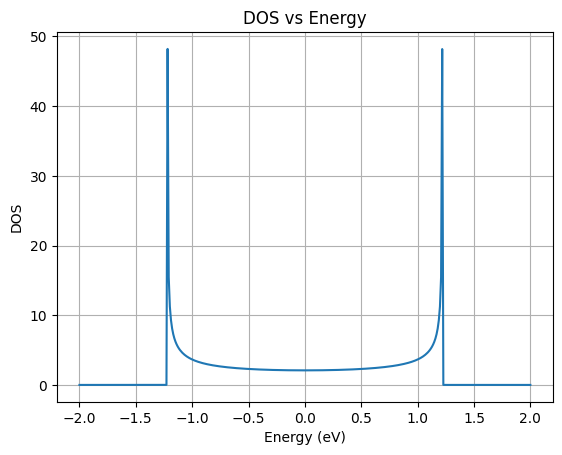

In [6]:
plt.plot(negf_out['uni_grid'], negf_out['DOS'][str(negf_out['k'][0])])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.title('DOS vs Energy')
plt.grid()
plt.show()

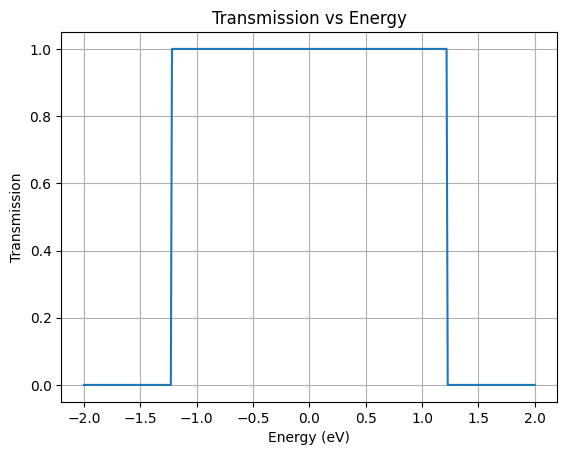

In [7]:
plt.plot(negf_out['uni_grid'], negf_out['T_avg'])
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.title('Transmission vs Energy')
plt.grid()
plt.show()